# Capstone Project Unit 1- Examining Airline Reviews and Increasing Customer Experience 

Skytrax is an airline and airport review and ranking site. This dataset contains over 41,000 airline reviews from 2015. 
To access the dataset you can visit the linked website here-- https://github.com/quankiquanki/skytrax-reviews-dataset. 

We'll be specifically reviewing the airline dataset, which includes columns for airline_name, link, title, author, author_country, date, content, aircraft, type_traveller, cabin_flown, route, overall_rating, seat_comfort_rating, cabin_staff_rating, food_beverages_rating, inflight_entertainment_rating, ground_service_rating, wifi_connectivity_rating, value_money_rating, and recommended. 

In this report, we'll look at the difference between two lower cost competing european airlines; Norwegian airlines and Ryanair. We'll look to see if we can spot a significant difference between their ratings, and if there are certain categories that are lower in ratings that we can propose solutions to, to ultimately increase the overall experience for their customers.  


In [256]:
#import our packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [257]:
#set our figure size
plt.rcParams['figure.figsize'] = (15.0, 7.0)
plt.rcParams.update({'font.size': 15})

In [258]:
#open dataframe
df = pd.read_csv("airline.csv")
#drop unneeded columns
df = df.drop(['link', 'title','author','content'], axis=1)
#adjust dataset to only include what we're interested in
airline = ['ryanair','norwegian']
df.replace('NaN', np.nan)
df = df[df['airline_name'].isin(airline)].dropna(subset=['overall_rating','date']) 
df.head(10)

,airline_name,author_country,date,aircraft,type_traveller,cabin_flown,route,overall_rating,seat_comfort_rating,cabin_staff_rating,food_beverages_rating,inflight_entertainment_rating,ground_service_rating,wifi_connectivity_rating,value_money_rating,recommended
25998,norwegian,United States,7/31/2015,Boeing 777,Couple Leisure,Economy,Helsinki to Los Angeles via Stockholm,1.0,1.0,1.0,1.0,1.0,1.0,NaN,2.0,0
26006,norwegian,United States,7/28/2015,Boeing 787,Couple Leisure,Premium Economy,Gatwick to Los Angeles,8.0,4.0,5.0,3.0,5.0,4.0,NaN,5.0,1
26007,norwegian,Spain,7/27/2015,Boeing 737-800,Business,Economy,HAM to LPA,8.0,5.0,5.0,NaN,5.0,4.0,5.0,5.0,1
26014,norwegian,United Kingdom,7/26/2015,NaN,FamilyLeisure,Economy,Gatwick to JFK,1.0,NaN,NaN,NaN,NaN,1.0,NaN,1.0,0
26015,norwegian,United States,7/22/2015,"Boeing 737-800, Boeing 787-8",FamilyLeisure,Premium Economy,BUD to JFK via ARN,9.0,5.0,5.0,5.0,5.0,4.0,4.0,5.0,1
26023,norwegian,United Kingdom,7/21/2015,NaN,Solo Leisure,Economy,London Gatwick to Tromsoe via Oslo,6.0,2.0,3.0,NaN,NaN,3.0,NaN,4.0,1
26024,norwegian,United Kingdom,7/19/2015,Dreamliner,Couple Leisure,First Class,Gatwick to JFK,9.0,5.0,4.0,4.0,2.0,3.0,NaN,4.0,1
26032,norwegian,Norway,7/18/2015,Boeing 737-800,FamilyLeisure,Economy,TRD to CPH,10.0,5.0,5.0,3.0,5.0,5.0,3.0,5.0,1
26033,norwegian,Germany,7/10/2015,NaN,FamilyLeisure,Economy,SXF to HAU via Oslo,1.0,2.0,3.0,NaN,NaN,1.0,NaN,3.0,0
26040,norwegian,Sweden,7/10/2015,Boeing 737-800,Solo Leisure,Economy,Copenhagen to Madrid,1.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,0


In [259]:
#take a quick look at the dataset overall
df.describe()

,overall_rating,seat_comfort_rating,cabin_staff_rating,food_beverages_rating,inflight_entertainment_rating,ground_service_rating,wifi_connectivity_rating,value_money_rating,recommended
count,904.000000,860.000000,860.000000,826.000000,329.000000,62.000000,14.000000,904.000000,904.000000
mean,6.710177,3.383721,3.532558,2.148910,2.984802,2.564516,2.214286,3.829646,0.683628
std,3.282908,1.214662,1.393519,1.657557,1.776304,1.564158,1.528125,1.392022,0.465317
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,4.000000,3.000000,3.000000,0.000000,1.000000,1.000000,1.000000,3.000000,0.000000
50%,8.000000,4.000000,4.000000,2.000000,3.000000,2.500000,1.500000,4.000000,1.000000
75%,10.000000,4.000000,5.000000,4.000000,5.000000,4.000000,3.000000,5.000000,1.000000
max,10.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000


In [260]:
#take a look at our sample sizes 
df['airline_name'].value_counts()

ryanair      528
norwegian    376
Name: airline_name, dtype: int64

In [261]:
#check our overall rating means 
print('norwegian ratings', (df[df.airline_name == 'norwegian']).overall_rating.mean())
print('ryanair ratings', (df[df.airline_name == 'ryanair']).overall_rating.mean())

norwegian ratings 6.949468085106383
ryanair ratings 6.5397727272727275


Looks like norwegian airlines has a slightly higher rating overall, lets check it's significance. 

In [262]:
#check the means significance level
stats.ttest_ind(df[df.airline_name == 'norwegian'].overall_rating,df[df.airline_name == 'ryanair'].overall_rating)

Ttest_indResult(statistic=1.8518784998934836, pvalue=0.06436987715039752)

It seems our pvalue is slightly greater than .05, thus we will fail to reject the null hypothesis, and we cannot say that Norwegian Airlines performs better than that of Ryanair. 

In [263]:
#check our recommended means 
print('norwegian ratings', (df[df.airline_name == 'norwegian']).recommended.mean())
print('ryanair ratings', (df[df.airline_name == 'ryanair']).recommended.mean())

norwegian ratings 0.7207446808510638
ryanair ratings 0.6571969696969697


In [264]:
#check our recommended means significance 
stats.ttest_ind(df[df.airline_name == 'norwegian'].recommended,df[df.airline_name == 'ryanair'].recommended)

Ttest_indResult(statistic=2.0273279985366988, pvalue=0.042922506636153844)

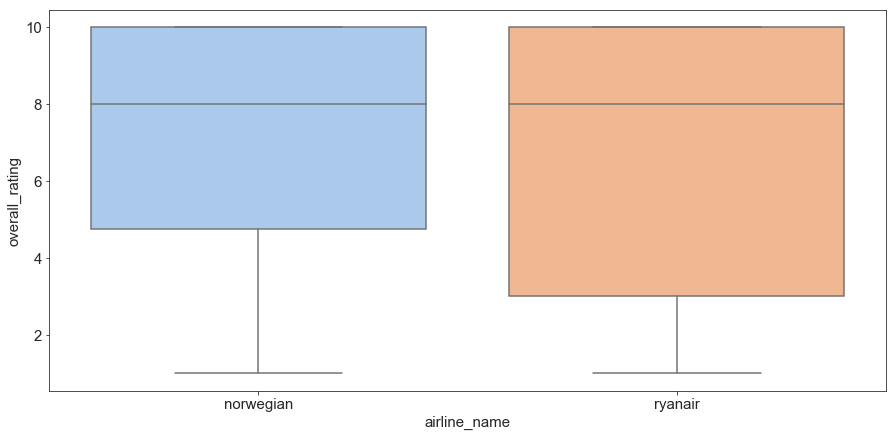

In [272]:
#visual representation of the overall ratings 
sns.boxplot(x=df['airline_name'], y=df['overall_rating'], palette='pastel')

c:\users\student\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
c:\users\student\appdata\local\programs\python\python37-32\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


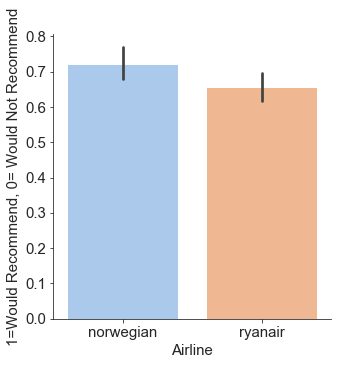

In [274]:
#visual representation of the recommendations
f = sns.factorplot(x='airline_name', y='recommended', data=df, kind='bar', palette='pastel')
f.set_ylabels('1=Would Recommend, 0= Would Not Recommend')
f.set_xlabels('Airline')

Text(0.5, 1.0, 'Ryanair')

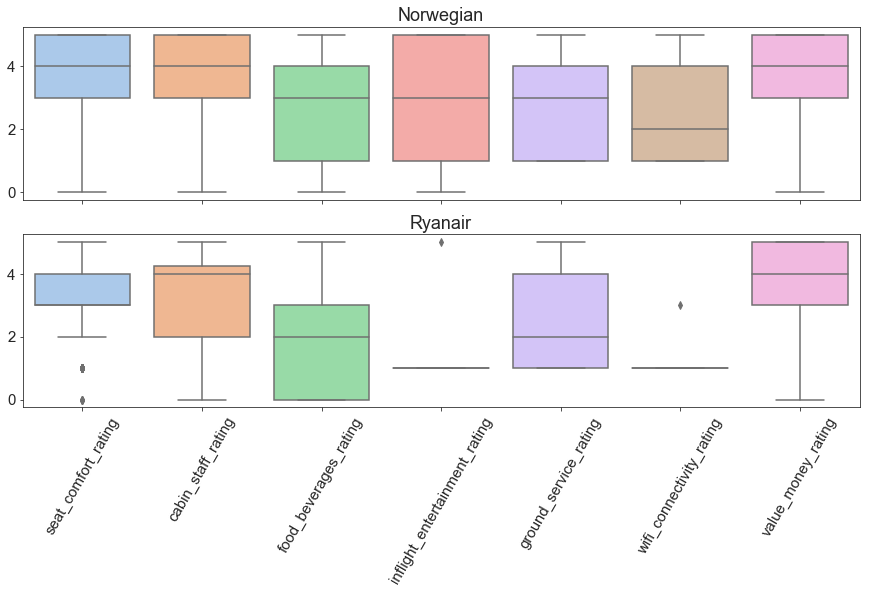

In [275]:
#lets grab a quick overview for all the different ratings for each airline 

#remove two rankings that we've already assessed
df2 = df.drop(['recommended','overall_rating'], axis=1) 
plt.subplot(211)
g = sns.boxplot(data=df2[df2.airline_name == 'norwegian'],palette='pastel')
g.set(xticklabels=[])
plt.title('Norwegian')

plt.subplot(212)
g = sns.boxplot(data=df2[df2.airline_name == 'ryanair'],palette='pastel')
g.set_xticklabels(g.get_xticklabels(),rotation=60)
plt.title('Ryanair')

In [268]:
#lets get the above figures in writing
df2 = df[df.airline_name == 'norwegian']
df2.describe()

,overall_rating,seat_comfort_rating,cabin_staff_rating,food_beverages_rating,inflight_entertainment_rating,ground_service_rating,wifi_connectivity_rating,value_money_rating,recommended
count,376.000000,332.000000,332.000000,321.000000,323.000000,26.000000,9.000000,376.000000,376.000000
mean,6.949468,3.762048,3.743976,2.398754,3.009288,2.500000,2.666667,3.896277,0.720745
std,3.279040,1.204475,1.329696,1.588001,1.771910,1.421267,1.658312,1.407556,0.449231
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,4.750000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,3.000000,0.000000
50%,8.000000,4.000000,4.000000,3.000000,3.000000,3.000000,2.000000,4.000000,1.000000
75%,10.000000,5.000000,5.000000,4.000000,5.000000,4.000000,4.000000,5.000000,1.000000
max,10.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000


In [210]:
df3 = df[df.airline_name == 'ryanair']
df3.describe()

,overall_rating,seat_comfort_rating,cabin_staff_rating,food_beverages_rating,inflight_entertainment_rating,ground_service_rating,wifi_connectivity_rating,value_money_rating,recommended
count,528.000000,528.000000,528.000000,505.000000,6.000000,36.000000,5.000000,528.000000,528.000000
mean,6.539773,3.145833,3.399621,1.990099,1.666667,2.611111,1.400000,3.782197,0.657197
std,3.278116,1.160523,1.417350,1.682632,1.632993,1.678056,0.894427,1.380230,0.475096
min,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,3.000000,3.000000,2.000000,0.000000,1.000000,1.000000,1.000000,3.000000,0.000000
50%,8.000000,3.000000,4.000000,2.000000,1.000000,2.000000,1.000000,4.000000,1.000000
75%,10.000000,4.000000,4.250000,3.000000,1.000000,4.000000,1.000000,5.000000,1.000000
max,10.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,5.000000,1.000000


c:\users\student\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  


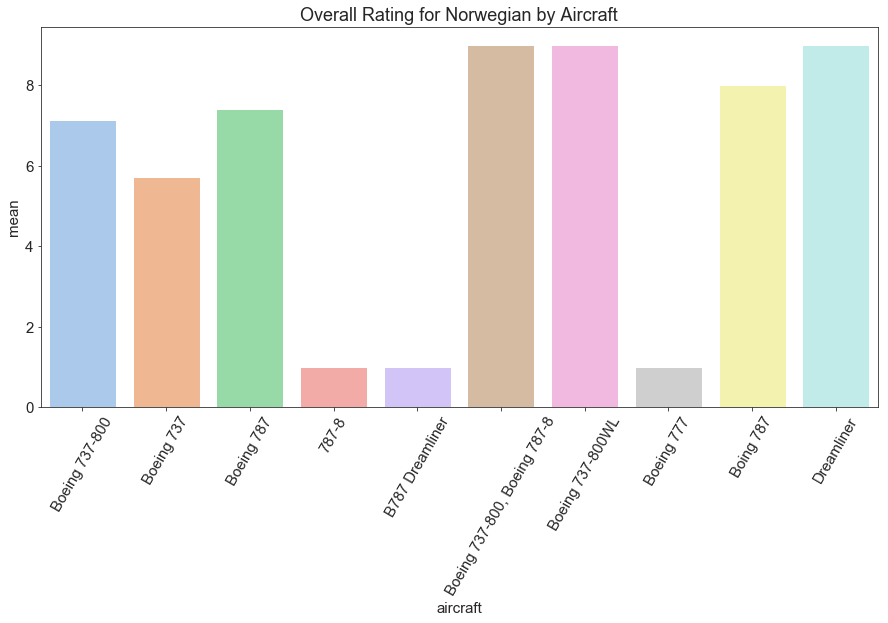

In [245]:
#lets check to see how much overall ratings vary by aircraft
ax = df.groupby('aircraft')['overall_rating'].agg({'mean': 'mean', 'count': 'count'}).reset_index(
).sort_values(by='count', ascending=False).head(10)
plot = sns.barplot(x='aircraft', y='mean', data=ax, palette='pastel')
plot.set_title('Overall Rating for Norwegian by Aircraft')
for item in plot.get_xticklabels():
    item.set_rotation(60)

Ah, that's rather varied, so we'll have to be sure to account for each different aircraft in our study.

# Experimental Hypothesis

Let's assume we're working with Norwegian airlines, and we want to be able to significantly state that our airline is better rated overall than ryanair. 

We can see from the above graphics that our lowest performing segment is food and beverages. I'd hypothesize, that if we increase our food and beverages selection, we'd get higher overall ratings, and thus increase our sample overall rating mean to have a signficant difference from that of Ryanair. 

## Rollout Plan

I would first assess to see which airlines have good ratings as a benchmark for food and beverage selections (which can actually be done with this dataset if we had not limited it to just the two airlines) and decipher what selections are common and favorited amongst those airlines that we currently do not offer. We can then decipher the options we'd like to incorporate onto our flights. 

I would then select a random assortment of aircrafts to apply the food options to, we'll assume here that all our flights were missing the options that were popular amongst the higher rated airlines, so our sample is unbiased and has a good assortment of different flights as we see here. 

The study would be conducted over a period that's not around the holiday seasons, as that would likely skew the data with the increased number of flights. Additionally, I would perform a gradual rollout (firstly on 10% of the airlines, and then 50%)  so that if anything goes wrong, we can quickly roll back the study. 

## Evaluation Plan

Success Metric - We want our overall rating to be higher than that of Ryanair, and thus our p-value needs to be .05 or less to prove significant. 

Secondary Metric - We will also look towards our recommended rating in comparison to Ryanair. As we can see per the previous calculation, Norwegian is significantly higher than that of Ryanair with a p value of .04. However, can we get the p value lower, and our mean higher in this experiment? 